# nb2wp - Convert Jupyter Notebook to Wordpress.com HTML

This post describes [**nb2wp**](https://github.com/bennylp/nb2wp) utility to convert Jupyter notebooks to plain HTML suitable for Wordpress.com. Note the difference between **Wordpress.com** service and Wordpress.org platform. The Wordpress.com service is much stricter (no arbitrary plugins, no scripts, no CSS, no `data:` URI, etc.).

This utility does the following:
- convert .ipynb to HTML using [nbconvert](https://nbconvert.readthedocs.io/en/latest/) using selected template (full, basic, or custom)
- convert the CSS to inline style using [pynliner](https://pythonhosted.org/pynliner/) so that the style will be honoured by Wordpress. By default it replaces the CSS given by nbconvert with custom and simpler `style.css` that can be inlined by pynliner.
- extract embedded images (such as ones produced by Matplotlib) and local images to `img` directory. You need to upload this `img` directory somewhere and provide URL prefix for the images.
- convert Latex directives to Wordpress.com Latex directives.

Then you need to do some manual works:
- copy-paste the HTML inside the `<body>` to Wordpress HTML editor
- upload the image directory.

If you're reading this in [IndoML Wordpress blog](https://indoml.com/2019/09/24/converting-jupyter-notebook-to-wordpress-com-html/), you are actually reading the result of the conversion. You can view the original notebook [on GitHub](https://github.com/bennylp/nb2wp/blob/master/Readme.ipynb) or [with nbviewer](https://nbviewer.jupyter.org/github/bennylp/nb2wp/blob/master/Readme.ipynb). As you can see the output is quite similar.

### Notes and Limitations

- **BEWARE with stray dollar character in your notebook. The script will interpret that as Latex directive.**
- Long line (width wise) in code cell is not displayed correctly.
- The CSS will ignore your Wordpress theme. The post will look more like Jupyter notebook than your themed blog.
- There are a lot of untidy elements here and there. We'll fix this as we go along.
- The pynliner cannot handle selector containing parenthesis (e.g. `div:not([blah])`) and `~` (tilde) operator. That's why we use custom css.

# General Guides

## Installation

Clone [nb2wp](https://github.com/bennylp/nb2wp) repository to get the files.

## Running

In [1]:
from nb2wp import nb2wp

help(nb2wp)

Help on function nb2wp in module nb2wp:

nb2wp(nbfile, out_dir='', template='full', css_files=['style.css'], save_img=True, img_dir='img', img_url_prefix='img', latex='wp', remove_attrs=True, footer=True, save_css=False, save_html=False, quiet=False)
    Convert Jupyter notebook file to Wordpress.com HTML.
    
    Parameters:
    nbfile:     The Jupyter notebook file
    out_dir:    Specify output directory. If empty,  a directory  with the same
                name as the notebook file will be created.
    template:   (Optional) nbconvert template file. The default is "full".  You
                may specify standard nbconvert template names such as "full" or
                "basic", or the path of custom nbconvert .TPL file.
    css_files:  Specify list of CSS files  to use.  The files will be  appended
                after one another. Default is  ['style.css'].  If not specified, 
                the CSS provided by nbconvert will be used.
    save_img:   Save  inline images  to 

### Generating Wordpress HTML

In [2]:
nb2wp('Readme.ipynb', out_dir='out/Readme',  remove_attrs=False,
      img_url_prefix='https://raw.githubusercontent.com/' + 
                     'bennylp/nb2wp/master/out/Readme/img')

Using template: full
Using CSS files ['style.css']
out/Readme\Readme.html: 177944 bytes written in 31.687s


The command above will do the following:
- create `Readme.html` in `out/Readme` directory
- extract images to `out/Readme/img` directory
- set the `<img> src` to use 'https://raw.githubusercontent.com/bennylp/nb2wp/master/out/Readme/img' as the prefix. For example, if the file is `img1.png`, then the file should be reachable as `'https://raw.githubusercontent.com/bennylp/nb2wp/master/out/Readme/img/img1.png'

Then you need to open `Readme.html` (open [out/Readme/Readme.html](out/Readme/Readme.html) if you're reading this from Jupyter notebook) and copy/paste the elements inside `<body>` to Wordpress HTML editor.

As for the image, in this example we place the image files on GitHub along with this notebook, so I just need to add, commit, and push this repository to make the images available at the above URL prefix. If you serve the image files from elsewhere, you need to copy the images there and call with `img_url_prefix` parameter set accordingly.

That's pretty much all. The rest of the notebook is to demonstrate various notebook features that can be converted by the utility.

# Markdown Conversions

All markdown features should be converted. These are some Markdown demos from https://markdown-it.github.io/.

## h2 Heading
### h3 Heading
#### h4 Heading
##### h5 Heading
###### h6 Heading

## Horizontal Rules

Various ways to create horizontal lines:
___

---

***

## Typography

**This is bold text**

__This is also bold text__

*This is italic text*

_This is also italic text_

~~Strikethrough~~

## Blockquotes


> Blockquotes can also be nested...
>> ...by using additional greater-than signs right next to each other...
> > > ...or with spaces between arrows.


## Lists

Unordered

+ Create a list by starting a line with `+`, `-`, or `*`
+ Sub-lists are made by indenting 2 spaces:
  - Marker character change forces new list start:
    * Ac tristique libero volutpat at
    + Facilisis in pretium nisl aliquet
    - Nulla volutpat aliquam velit
+ Very easy!

Ordered

1. Lorem ipsum dolor sit amet
   1. Facilisis in pretium nisl aliquet
   2. Nulla volutpat aliquam velit
2. Consectetur adipiscing elit
3. Integer molestie lorem at massa


1. You can use sequential numbers...
1. ...or keep all the numbers as `1.`

Start numbering with offset:

57. foo
1. bar


## Code

Inline `code`

Indented code

    // Some comments
    line 1 of code
    line 2 of code
    line 3 of code


Block code "fences"

```
Sample text here...
```

Syntax highlighting

``` js
var foo = function (bar) {
  return bar++;
};

console.log(foo(5));
```


## Tables

| Option | Description |
| ------ | ----------- |
| data   | path to data files to supply the data that will be passed into templates. |
| engine | engine to be used for processing templates. Handlebars is the default. |
| ext    | extension to be used for dest files. |

Right aligned columns

| Option | Description |
| ------:| -----------:|
| data   | path to data files to supply the data that will be passed into templates. |
| engine | engine to be used for processing templates. Handlebars is the default. |
| ext    | extension to be used for dest files. |




## Links

[link text](https://wikipedia.org)

[link with title](https://wikipedia.org "The great Wikipedia!")

Autoconverted link https://wikipedia.org



## Images

### Remote Image

Remote images (images with `src` URL containing full http URL) should work.

![Wikipedia](https://upload.wikimedia.org/wikipedia/commons/7/74/Wikipedia-logo-es.png)

### Local Image

Local images (images with `src` pointing to local image) will be copied to `out_dir/img` directory its name renamed.

Below is an image of a carrot. Can you see it?

![A carrot](carrot.png)

(source: http://pngimg.com/download/4984)

# Latex

Latex directives will be converted. Supported target currently is "wp".

This formula: $\sigma = \frac{1}{1 + e^{-x}}$ is a definition of sigmoid.

So is this, only bigger and is place on its own line:

$$\sigma = \frac{1}{1 + e^{-x}}$$

# Pandas DataFrame

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
        'name':['john','mary','peter','jeff','bill','lisa'],
        'age':[23,78,22,19,12,33],
        'state':['N/A','dc','california','texas','N/A','dc']
     })
print('Showing a dataframe:')
df

Showing a dataframe:


,age,name,state
0,23,john,N/A
1,78,mary,dc
2,22,peter,california
3,19,jeff,texas
4,12,bill,N/A
5,33,lisa,dc


# Matplotlib

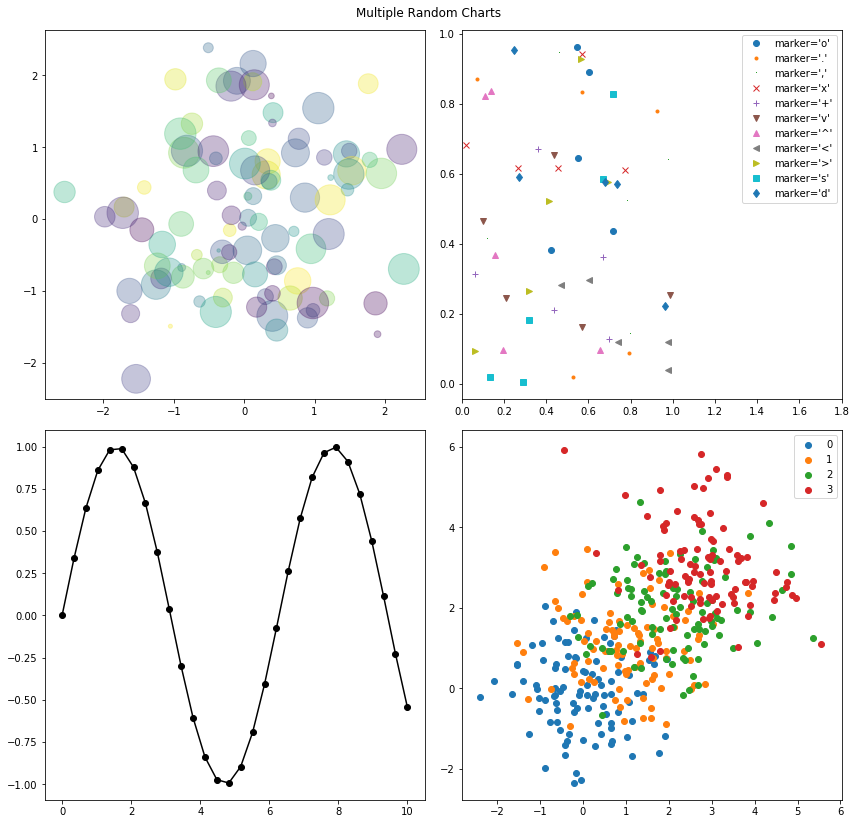

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Multiple Random Charts')
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

ax1.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')

rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    ax2.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
ax2.legend(numpoints=1)
ax2.set_xlim(0, 1.8);

x = np.linspace(0, 10, 30)
y = np.sin(x)
ax3.plot(x, y, '-ok');

for i in range(4):
    x = np.random.normal(loc=i, size=100)
    y = np.random.normal(loc=i, size=100)
    ax4.scatter(x, y, label=str(i))
ax4.legend()

fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

## Run Again

Let's run the conversion again to make sure everything above this has been run.

In [6]:
nb2wp('Readme.ipynb', out_dir='out/Readme',  remove_attrs=False,
      img_url_prefix='https://raw.githubusercontent.com/' + 
                     'bennylp/nb2wp/master/out/Readme/img')

Using template: full
Using CSS files ['style.css']
out/Readme\Readme.html: 177984 bytes written in 30.435s
